<a href="https://colab.research.google.com/github/Aashik1701/Alzheimer-s-Detection-Deep_Learning/blob/main/Alzheimer's_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ninadaithal_imagesoasis_path = kagglehub.dataset_download('ninadaithal/imagesoasis')

print('Data source import complete.')


100%|██████████| 1.23G/1.23G [00:25<00:00, 52.2MB/s]

Extracting files...


Data source import complete.


In [5]:
import kagglehub

# Download latest version
ninadaithal_imagesoasis_path = kagglehub.dataset_download("ninadaithal/imagesoasis")

print("Path to dataset files:", ninadaithal_imagesoasis_path)

Path to dataset files: /root/.cache/kagglehub/datasets/ninadaithal/imagesoasis/versions/1


In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Data Preprocessing

In [15]:
# Import Libraries
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

import kagglehub

# Download latest version
path = kagglehub.dataset_download("tejasai21/srksaisuri")

print("Path to dataset files:", path)

# Define Paths
dataset_dir = path  # Root folder containing class folders
# Adjust class names to match actual folder names
classes = ["Mild Dementia", "Moderate Dementia", "Non Demented", "Very mild Dementia"]

# Load Data with Correct Folder Names
image_paths, labels = [], []
for class_label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"Error: Folder {class_dir} does not exist.")
        continue
    files = glob.glob(f"{class_dir}/*.jpg")  # Adjust extension if needed
    print(f"Class: {class_name}, Files Found: {len(files)}")  # Debug: Count files
    for file_path in files:
        image_paths.append(file_path)
        labels.append(class_label)

# Proceed with the pipeline if files are found
if len(image_paths) == 0:
    raise ValueError("No images found. Check dataset folder names or file paths.")

100%|██████████| 1.23G/1.23G [00:21<00:00, 62.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tejasai21/srksaisuri/versions/1
Error: Folder /root/.cache/kagglehub/datasets/tejasai21/srksaisuri/versions/1/Mild Dementia does not exist.
Error: Folder /root/.cache/kagglehub/datasets/tejasai21/srksaisuri/versions/1/Moderate Dementia does not exist.
Error: Folder /root/.cache/kagglehub/datasets/tejasai21/srksaisuri/versions/1/Non Demented does not exist.
Error: Folder /root/.cache/kagglehub/datasets/tejasai21/srksaisuri/versions/1/Very mild Dementia does not exist.


ValueError: No images found. Check dataset folder names or file paths.

In [4]:
# prompt: import dataset from "https://drive.google.com/drive/folders/1UFB3uCVQnjriVblWY_VfJBxEcDw2QSID?usp=sharing" this googlw drive link

!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np


# Define Paths
dataset_dir = '/content/drive/MyDrive/DeepLearningProject'  # Root folder containing class folders
# Adjust class names to match actual folder names
classes = ["Mild Dementia", "Moderate Dementia", "Non Demented", "Very mild Dementia"]

# Load Data with Correct Folder Names
image_paths, labels = [], []
for class_label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"Error: Folder {class_dir} does not exist.")
        continue
    files = glob.glob(f"{class_dir}/*.jpg")  # Adjust extension if needed
    print(f"Class: {class_name}, Files Found: {len(files)}")  # Debug: Count files
    for file_path in files:
        image_paths.append(file_path)
        labels.append(class_label)

# Proceed with the pipeline if files are found
if len(image_paths) == 0:
    raise ValueError("No images found. Check dataset folder names or file paths.")


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Class: Mild Dementia, Files Found: 5012
Class: Moderate Dementia, Files Found: 488
Class: Non Demented, Files Found: 6119
Class: Very mild Dementia, Files Found: 634


In [5]:
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# Define Paths
dataset_dir = "/content/drive/MyDrive/DeepLearningProject"  # Ensure this path matches the extracted dataset location

# Define Class Labels
classes = ["Mild Dementia", "Moderate Dementia", "Non Demented", "Very mild Dementia"]

# Verify Dataset Structure
for dirname, _, filenames in os.walk(dataset_dir):
    print(f"Directory: {dirname}, Files Found: {len(filenames)}")

# Load Data
image_paths, labels = [], []
for class_label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)

    if not os.path.exists(class_dir):
        print(f"Error: Folder {class_name} does not exist in {dataset_dir}.")
        continue

    files = glob.glob(os.path.join(class_dir, "*.jpg"))  # Adjust extension if needed
    print(f"Class: {class_name}, Files Found: {len(files)}")

    for file_path in files:
        image_paths.append(file_path)
        labels.append(class_label)

# Check if Images Were Loaded
if len(image_paths) == 0:
    raise ValueError("No images found. Check dataset folder names or file paths.")

print(f"Total Images Loaded: {len(image_paths)}")


Directory: /content/drive/MyDrive/DeepLearningProject, Files Found: 0
Directory: /content/drive/MyDrive/DeepLearningProject/Mild Dementia, Files Found: 5012
Directory: /content/drive/MyDrive/DeepLearningProject/Moderate Dementia, Files Found: 488
Directory: /content/drive/MyDrive/DeepLearningProject/Non Demented, Files Found: 6119
Directory: /content/drive/MyDrive/DeepLearningProject/Very mild Dementia, Files Found: 634
Class: Mild Dementia, Files Found: 5012
Class: Moderate Dementia, Files Found: 488
Class: Non Demented, Files Found: 6119
Class: Very mild Dementia, Files Found: 634
Total Images Loaded: 12253


In [6]:
# Split Dataset
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Total images: {len(image_paths)}")
print(f"Training images: {len(train_paths)}, Testing images: {len(test_paths)}")

Total images: 12253
Training images: 9802, Testing images: 2451


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

# Normalize image paths and labels
train_paths = np.array(train_paths)
test_paths = np.array(test_paths)

# One-hot encode the labels
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

# Preprocessing Function for Images
IMG_HEIGHT, IMG_WIDTH = 224, 224

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load Dataset
def load_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(lambda x, y: (preprocess_image(x), y))
    return dataset

# Prepare Train and Test Datasets
train_dataset = load_dataset(train_paths, train_labels)
test_dataset = load_dataset(test_paths, test_labels)

# Batch and Shuffle the Datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


# Model Training

In [8]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(classes), activation='softmax')  # Number of classes
    ])
    return model

model = build_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam
# Number of epochs
total_epochs = 10

# Loop through each epoch
for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")

    # Train for one epoch
    history = model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=1  # Train for one epoch
    )

    # Save the model after each epoch
    model.save(f"alzheimers_detection_model_epoch_{epoch + 1}.h5")

Epoch 1/10


ValueError: You must call `compile()` before using the model.

In [10]:
from tensorflow.keras.optimizers import Adam

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
EPOCHS = 10
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

# Save the Model
model.save("alzheimers_detection_model.h5")


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1807s 5s/step - accuracy: 0.6483 - loss: 0.7908 - val_accuracy: 0.9641 - val_loss: 0.1069
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1302s 4s/step - accuracy: 0.9533 - loss: 0.1320 - val_accuracy: 0.9874 - val_loss: 0.0326
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1331s 4s/step - accuracy: 0.9825 - loss: 0.0490 - val_accuracy: 0.9931 - val_loss: 0.0159
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1264s 4s/step - accuracy: 0.9850 - loss: 0.0400 - val_accuracy: 0.9914 - val_loss: 0.0232
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1209s 4s/step - accuracy: 0.9901 - loss: 0.0289 - val_accuracy: 0.9918 - val_loss: 0.0169
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1298s 4s/step - accuracy: 0.9911 - loss: 0.0269 - val_accuracy: 0.9910 - val_loss: 0.0194
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1246s 4s/step - accuracy: 0.9909 - loss: 0.0242 - val_accuracy: 0.9931 - val_loss: 0.0178
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1217s 4s/step - accuracy: 0.9941 - loss: 0.0163 - 

# Evaluation

77/77 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9978 - loss: 0.0057
Test Loss: 0.0078, Test Accuracy: 0.9971


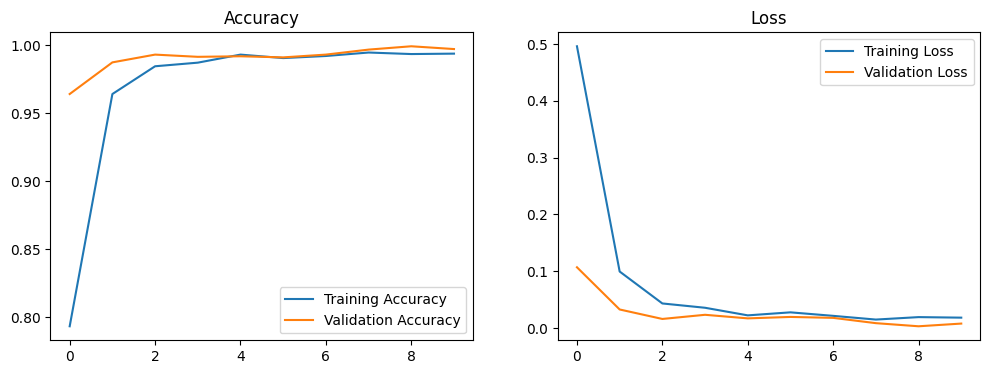

In [11]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_history(history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_true = np.argmax(test_labels, axis=1)
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)

# Classification Report
class_names = classes
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

54/77 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step

# Testing

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Testing on a Single Image
test_image_path = r'/kaggle/input/imagesoasis/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_105.jpg'
test_image = preprocess_image(test_image_path)
test_image = tf.expand_dims(test_image, axis=0)  # Adding batch dimension

prediction = model.predict(test_image)
predicted_class = label_binarizer.inverse_transform(prediction)[0]
print(f"Predicted Class: {predicted_class}")

if predicted_class==0:
    pred_label="Mild Dementia"
elif predicted_class==1:
    pred_label="Moderate Dementia"
elif predicted_class==2:
    pred_label="Non Demented"
else:
    pred_label="Very Mild Dementia"

# Display Image + Prediction
plt.imshow(plt.imread(test_image_path))
plt.title(f"Predicted Class: {predicted_class}, Predicted Label: {pred_label}")
plt.axis('off')
plt.show()
